## Задача 3.4
Даны [результаты работы двух машинных переводчиков на небольших выборках переводов для разных языковых пар](data/mt).

Стандартная оценка качества перевода производится с использованием специальной метрики [BLEU](https://en.wikipedia.org/wiki/BLEU). (Реализовано [здесь](https://www.nltk.org/_modules/nltk/translate/bleu_score.html)).


Требуется опеделить:
* превосходит ли один переводчик в среднем по парам второй переводчик по переводу
* связано ли качество перевода для разных языковых пар для двх переводчиков?

При подсчете BLEU учитывать только слова, регистр не учитывать. 

**Формат данных**

Названиие файлов имеет формат lang1_lang2_<translator_id>.txt:

lang_1, lang_2 --- языки (перевод с lang_1 на lang_2).

gold - эталонный вариант, с которым сравнивается перевод от систем машинного перевода.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns
import statsmodels

In [3]:
from nltk.translate.bleu_score import corpus_bleu
import nltk
from nltk import tokenize
import string
from nltk.translate.bleu_score import SmoothingFunction
sf = SmoothingFunction().method4
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/oem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
text_size = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = text_size

In [5]:
# функция для токенизации текстов
def tokens(path1, path2, Type):
    sentances1 = []        
    with open(path1, 'r') as f:
        for line in f.readlines():
            sentances1.append(line)
        
    if path2:
        sentances2 = []
        with open(path2, 'r') as f:
            for line in f.readlines():
                sentances2.append(line)
    else:
        sentances2 = sentances1

    tokenized_data = []
    for i in range(min(len(sentances1),len(sentances2))):
        sentance1 = nltk.word_tokenize(sentances1[i].lower())
        #sentance1 = [i for i in sentance1 if ( i not in string.punctuation )]
        if path2:
            sentance2 = nltk.word_tokenize(sentances2[i].lower())
            #sentance2 = [i for i in sentance2 if ( i not in string.punctuation )]
            tokenized_data.append([sentance1, sentance2])
        else:
            if Type == 'c':
                tokenized_data.append(sentance1)
            if Type == 'r':
                tokenized_data.append([sentance1])
    return tokenized_data

### Если хоти посчитать совместную точность для 2-ух переводов

In [6]:
ref = tokens('data/mt/de_en_1.txt', 'data/mt/de_en_2.txt', 'r')
candidates = tokens('data/mt/de_en_gold.txt', '', 'c')

In [334]:
score = corpus_bleu(ref, candidates)
print(score)

0.32518891891143104


### Если хоти посчитать раздельную точность для 2-ух переводов

#### Для de-en переводчиков

In [337]:
ref1 = tokens('data/mt/de_en_1.txt', '', 'r')
ref2 = tokens('data/mt/de_en_2.txt', '', 'r')
candidates = tokens('data/mt/de_en_gold.txt', '', 'c')

In [338]:
print(len(ref1), len(candidates))
print(len(ref2), len(candidates))

100 100
100 100


In [372]:
for i, sen in enumerate(ref1):
    if i > 5:
        break
    print(sen)
    print(ref2[i])
    print(candidates[i])
    print('-----------------------------------------------------------')

[['(', 'механика', 'қрғақтар', ')', '(', 'енуен', ')']]
[['(', 'механические', 'ритмы', ')', '(', 'музыка', ')']]
['(', 'механические', 'шумы', ')', '(', 'музыка', ')']
-----------------------------------------------------------
[['(', 'сиқырлар', ')']]
[['(', 'аплодисменты', ')']]
['(', 'аплодисменты', ')']
-----------------------------------------------------------
[['бұл', '-', 'идеялар', '.']]
[['его', 'идея', 'очень', 'проста', '.']]
['идея', 'очень', 'проста', '.']
-----------------------------------------------------------
[['30', 'адаммен', 'көкте', 'өмірге', 'келуге', 'болады', '.']]
[['помните', 'моменты', ',', 'которые', 'вы', 'хотите', 'изменить', 'свою', 'жизнь', ',', 'теперь', 'постарайтесь', 'сделать', 'это', '30', 'дней', '.']]
['вспомните', 'о', 'чём-', 'то', ',', 'что', 'вы', 'всегда', 'хотели', 'изменить', 'в', 'жизни', ',', 'и', 'делайте', 'это', 'ежедневно', 'в', 'течение', '30', 'дней', '.']
-----------------------------------------------------------
[['шын', 'мән

In [340]:
res1 = []
res2 = []

In [341]:
score1 = corpus_bleu(ref1, candidates, smoothing_function=sf)
score2 = corpus_bleu(ref2, candidates, smoothing_function=sf)
print("Точность для первого переводчика:", score1)
print("Точность для второго переводчика:", score2)
res1.append(score1)
res2.append(score2)

Точность для первого переводчика: 0.28354819461010244
Точность для второго переводчика: 0.2947519863200748


#### Для  en-kk переводчиков

In [342]:
ref1 = tokens('data/mt/en_kk_1.txt', '', 'r')
ref2 = tokens('data/mt/en_kk_2.txt', '', 'r')
candidates = tokens('data/mt/en_kk_gold.txt', '', 'c')

In [343]:
print(len(ref1), len(candidates))
print(len(ref2), len(candidates))

61 61
61 61


In [344]:
score1 = corpus_bleu(ref1, candidates, smoothing_function=sf)
score2 = corpus_bleu(ref2, candidates, smoothing_function=sf)
print("Точность для первого переводчика:", score1)
print("Точность для второго переводчика:", score2)
res1.append(score1)
res2.append(score2)

Точность для первого переводчика: 0.031151507803872696
Точность для второго переводчика: 0.030591657316339775


#### Для en-ru переводчиков

In [345]:
ref1 = tokens('data/mt/en_ru_1.txt', '', 'r')
ref2 = tokens('data/mt/en_ru_2.txt', '', 'r')
candidates = tokens('/datamt/en_ru_gold.txt', '', 'c')

In [346]:
print(len(ref1), len(candidates))
print(len(ref2), len(candidates))

94 94
94 94


In [347]:
score1 = corpus_bleu(ref1, candidates, smoothing_function=sf)
score2 = corpus_bleu(ref2, candidates, smoothing_function=sf)
print("Точность для первого переводчика:", score1)
print("Точность для второго переводчика:", score2)
res1.append(score1)
res2.append(score2)

Точность для первого переводчика: 0.12310712376575889
Точность для второго переводчика: 0.13672435874765176


#### Для ru-de переводчиков

In [348]:
ref1 = tokens('data/mt/ru_de_1.txt', '', 'r')
ref2 = tokens('data/mt/ru_de_2.txt', '', 'r')
candidates = tokens('data/mt/ru_de_gold.txt', '', 'c')

In [349]:
print(len(ref1), len(candidates))
print(len(ref2), len(candidates))

50 50
50 50


In [350]:
score1 = corpus_bleu(ref1, candidates, smoothing_function=sf)
score2 = corpus_bleu(ref2, candidates, smoothing_function=sf)
print("Точность для первого переводчика:", score1)
print("Точность для второго переводчика:", score2)
res1.append(score1)
res2.append(score2)

Точность для первого переводчика: 0.1831411682225125
Точность для второго переводчика: 0.19175042931598907


#### Для ru-kk переводчиков

In [351]:
ref1 = tokens('data/mt/ru_kk_1.txt', '', 'r')
ref2 = tokens('data/mt/ru_kk_2.txt', '', 'r')
candidates = tokens('data/mt/ru_kk_gold.txt', '', 'c')

In [352]:
print(len(ref1), len(candidates))
print(len(ref2), len(candidates))

90 90
90 90


In [353]:
score1 = corpus_bleu(ref1, candidates, smoothing_function=sf)
score2 = corpus_bleu(ref2, candidates, smoothing_function=sf)
print("Точность для первого переводчика:", score1)
print("Точность для второго переводчика:", score2)
res1.append(score1)
res2.append(score2)

Точность для первого переводчика: 0.06058063567543285
Точность для второго переводчика: 0.02067103685439211


#### Соберем все в табличку для наглядности

In [356]:
d = {"Translator 1" : pd.Series(res1, index = ['de_en', 'en_kk', 'en_ru', 'ru_de', 'ru_kk']),
     "Translator 2" : pd.Series(res2, index = ['de_en', 'en_kk', 'en_ru', 'ru_de', 'ru_kk'])}
df = pd.DataFrame(d)
df

,Translator 1,Translator 2
de_en,0.283548,0.294752
en_kk,0.031152,0.030592
en_ru,0.123107,0.136724
ru_de,0.183141,0.191750
ru_kk,0.060581,0.020671


### Превосходит ли один переводчик в среднем по парам второй переводчик по переводу?
Проверим гипотезу о равенстве стреднего для столбцов с помощью t-критерия.

In [359]:
print("p-value равен ", st.ttest_ind(res1, res2)[1])

p-value равен  0.984081648428788


P-value большой $\Rightarrow$ гипотеза не отвергается.

Это значит, что переводчики в среднем одинаковые.

### Связано ли качество перевода для разных языковых пар для двх переводчиков?

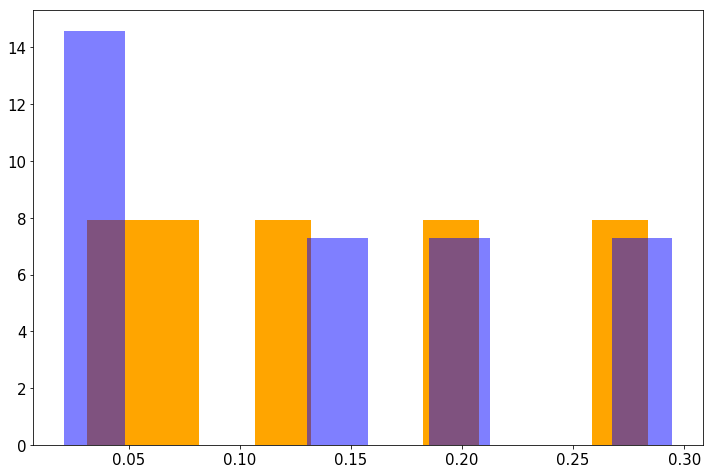

In [365]:
plt.hist(res1, color = 'orange', density=True)
plt.hist(res2, color = 'blue', density=True, alpha = 0.5)
plt.show()

In [371]:
result = st.pearsonr(res1,res2)
print("p-value равен ", round(result[1], 3))

p-value равен  0.002


In [369]:
result = st.kendalltau(res1,res2)
print("p-value равен ", round(result[1], 3))

p-value равен  0.083


In [370]:
result = st.spearmanr(res1,res2)
print("p-value равен ", round(result[1], 3))

p-value равен  0.037


Для двух тестов из трёх $p-value < 0.05$  $\Rightarrow$  качества перевода связаны